In [3]:
import numpy as np  # the Python array package
import matplotlib.pyplot as plt  # the Python plotting package
import numpy.linalg as npl
import nibabel as nib

%matplotlib inline

In [4]:
# - set gray colormap and nearest neighbor interpolation by default
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

In [6]:
# Get the data array from the image
img = nib.load('data/ds107_sub012_t1r2.nii')
data = img.get_data()

In [7]:
data.shape, data.ndim

((64, 64, 35, 166), 4)

##### Reshape to volumes by voxels

In [8]:
vol_shape = data.shape[:-1]

In [10]:
len(vol_shape)

3

In [11]:
vol_shape

(64, 64, 35)

In [12]:
n_vols = data.shape[-1]
n_vols

166

In [13]:
n_voxels = np.prod(vol_shape)
X = data.reshape(n_voxels, n_vols).T

In [14]:
X.shape

(166, 143360)

#### Subtract the mean across columns (row means):

In [15]:
X = X - X.mean(axis=1).reshape(n_vols, 1)

#### Calculate the unscaled covariance (covariance not divided by N-1):

In [16]:
unscaled_cov = X.dot(X.T)

Get the principal components (array `V`) using SVD:

In [17]:
U, S, V = npl.svd(unscaled_cov)

Plot the first principal component:

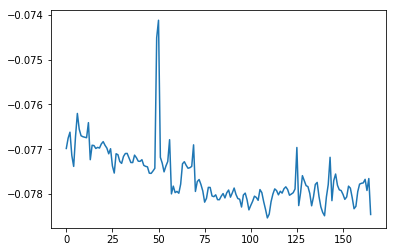

In [18]:
plt.plot(V[0])

Get the projection coefficients (lengths) for each principal component:

In [19]:
c_values = V.dot(X)
c_values.shape

(166, 143360)

Reshape the (number of volumes) by (voxels) array to x by y by z by number of volumes:

In [20]:
c_images = c_values.T.reshape(data.shape)

Show the projection coefficients for the first principal component:

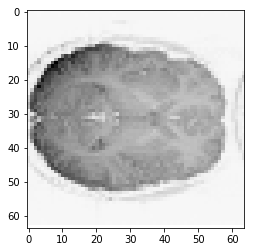

In [21]:
plt.imshow(c_images[:, :, 15, 0])

Show second principal component:

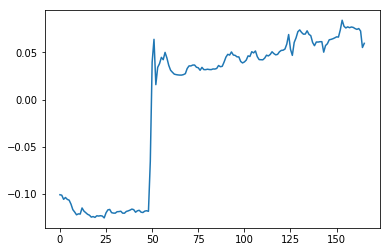

In [22]:
plt.plot(V[1])

Show projection coefficients for second principal component:

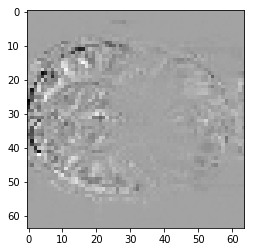

In [23]:
plt.imshow(c_images[:, :, 15, 1])